In [1]:
import sys
sys.path.append('/sbnd/app/users/brindenc/mypython') #My utils path
from bc_utils.CAFana import pic as CAFpic
from bc_utils.CAFana import plotters as CAFplotters
from bc_utils.utils import pic,plotters
from time import time
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import genfromtxt
from datetime import date
#import awkward as ak
#import ROOT

%load_ext autoreload
%autoreload 2

plt.style.use(['science','no-latex'])
day = date.today().strftime("i%Y_%m_%d")

#Params import
from CAFdata import * #Its okay to do this, they're all just variable names anyway

In [23]:
flat = FLAT_FILES
sel_evts = pd.read_csv('/sbnd/data/users/brindenc/analyze_sbnd/nue/states/2022A/2023_1_19/selected_events.txt',sep = "\t")
sel_evts.values[:,:3]

array([[238,  31, 315],
       [316,  11, 297],
       [ 42,  24, 107],
       [116,  25, 336],
       [173,  82,  11],
       [152,  26, 506]])

In [11]:
def load_selected_events(caflist,selected_events):
  """
  \param caflist: List of caf file names
  \param selected_events: array of selected events (run,subrun,event,slc id)
  """
  for file,i in enumerate(caflist):
    tree_evts = [] #Events the tree has
    tree = uproot.open(f'{DATA_DIR}{file}')
    keys = tree.keys()
    recTree_name = tree.keys()[0]
    tree = tree[recTree_name]
    hdr_dict = tree.arrays(hdrkeys,library='np')
    hdr_arr = []
    for hdr in hdrkeys:
      hdr_arr.append(hdr_dict[hdr])
    hdr_arr = np.array(hdr_arr)
    use_file = False #Default to not using file unless it contains specified events
    for event in selected_events:
      if event[:3] in hdr_arr:
        use_file = True
        tree_evts.append(event)
      
        

In [32]:
tree = uproot.open(f'{DATA_DIR}{flat[0]}')
keys = tree.keys()
recTree_name = tree.keys()[0]
tree = tree[recTree_name]
slc_pd = CAFpic.get_df(tree,mcslc_keys)
slc_pd.head(20)

rec.slc.truth.pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                      
304         76             4                           14   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           5                           14   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           8                           -1   
                           8                           14   
                           8                           -1   
                           8                           -1   

                                        rec.slc.truth.npizero  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                          
304         76             4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           8                                0   
                           8                                0   
                           8                                0   
                           8                                0   

                                        rec.slc.truth.parent_pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
304         76             4                                 211   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           5                                 211   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           8              

In [3]:
for i,file in enumerate(flat):
  start = time()
  tree = uproot.open(f'{DATA_DIR}{file}')
  keys = tree.keys()
  print(keys)
  if i > 3:
    break


['recTree;27', 'recTree;26', 'globalTree;1', 'TotalPOT;1', 'TotalEvents;1', 'metadata;1', 'metadata/metatree;1']
['recTree;29', 'recTree;28', 'globalTree;1', 'TotalPOT;1', 'TotalEvents;1', 'metadata;1', 'metadata/metatree;1']
['recTree;28', 'recTree;27', 'globalTree;1', 'TotalPOT;1', 'TotalEvents;1', 'metadata;1', 'metadata/metatree;1']
['recTree;28', 'recTree;27', 'globalTree;1', 'TotalPOT;1', 'TotalEvents;1', 'metadata;1', 'metadata/metatree;1']
['recTree;30', 'recTree;29', 'globalTree;1', 'TotalPOT;1', 'TotalEvents;1', 'metadata;1', 'metadata/metatree;1']


In [4]:
globalTree = uproot.open(f'{DATA_DIR}{flat[0]}:globalTree;1/global/wgts')
globalTree.keys()
globalTree.typenames()

{'wgts.name': 'std::string[]',
 'wgts.type': 'int32_t[]',
 'wgts.nuniv': 'int32_t[]',
 'wgts.covmx': 'std::vector<float>[]',
 'wgts.map': 'std::vector<caf::SRWeightMapEntry>[]'}

In [11]:
gdf = globalTree.arrays(['wgts.name','wgts.type','wgts.nuniv'],library='pd')
for row,line in gdf.iterrows():
  gdf.loc[row,'wgts.name'] = gdf.loc[row,'wgts.name'][row[1]]
gdf

wgts.name  wgts.type  wgts.nuniv
entry subentry                                                            
0     0                      AhtBY_multisigma_Genie          3           6
      1                      BhtBY_multisigma_Genie          3           6
      2                     CV1uBY_multisigma_Genie          3           6
      3                     CV2uBY_multisigma_Genie          3           6
      4                    EtaNCEL_multisigma_Genie          3           6
      5                   FormZone_multisigma_Genie          3           6
      6                    FrAbs_N_multisigma_Genie          3           6
      7                   FrAbs_pi_multisigma_Genie          3           6
      8                    FrCEx_N_multisigma_Genie          3           6
      9                   FrCEx_pi_multisigma_Genie          3           6
      10                  FrInel_N_multisigma_Genie          3           6
      11                 FrInel_pi_multisigma_Genie          3           6
      12                FrPiProd_N_multisigma_Genie          3           6
      13               FrPiProd_pi_multisigma_Genie          3           6
      14                     MFP_N_multisigma_Genie          3           6
      15                    MFP_pi_multisigma_Genie          3           6
      16                    MaCCQE_multisigma_Genie          3           6
      17                   MaCCRES_multisigma_Genie          3           6
      18                    MaNCEL_multisigma_Genie          3           6
      19                   MaNCRES_multisigma_Genie          3           6
      20                   MvCCRES_multisigma_Genie          3           6
      21                   MvNCRES_multisigma_Genie          3           6
      22        NonRESBGvbarnCC1pi_multisigma_Genie          3           6
      23        NonRESBGvbarnCC2pi_multisigma_Genie          3           6
      24        NonRESBGvbarnNC1pi_multisigma_Genie          3           6
      25        NonRESBGvbarnNC2pi_multisigma_Genie          3           6
      26        NonRESBGvbarpCC1pi_multisigma_Genie          3           6
      27        NonRESBGvbarpCC2pi_multisigma_Genie          3           6
      28        NonRESBGvbarpNC1pi_multisigma_Genie          3           6
      29        NonRESBGvbarpNC2pi_multisigma_Genie          3           6
      30           NonRESBGvnCC1pi_multisigma_Genie          3           6
      31           NonRESBGvnCC2pi_multisigma_Genie          3           6
      32           NonRESBGvnNC1pi_multisigma_Genie          3           6
      33           NonRESBGvnNC2pi_multisigma_Genie          3           6
      34           NonRESBGvpCC1pi_multisigma_Genie          3           6
      35           NonRESBGvpCC2pi_multisigma_Genie          3           6
      36           NonRESBGvpNC1pi_multisigma_Genie          3           6
      37           NonRESBGvpNC2pi_multisigma_Genie          3           6
      38                             multisim_Genie          0        1000
      39                               expskin_Flux          0        1000
      40                           horncurrent_Flux          0        1000
      41                                kminus_Flux          0        1000
      42                                 kplus_Flux          0        1000
      43                                 kzero_Flux          0        1000
      44                        nucleoninexsec_Flux          0        1000
      45                         nucleonqexsec_Flux          0        1000
      46                        nucleontotxsec_Flux          0        1000
      47                               piminus_Flux          0        1000
      48                           pioninexsec_Flux          0        1000
      49                            pionqexsec_Flux          0        1000
      50                           piontotxsec_Flux          0        1000
      51                                piplus_Flux          0     

In [3]:
flat[0]
tree = uproot.open(f'{DATA_DIR}{flat[0]}:recTree;27')
keys = tree.keys()
weight_keys = [key for key in keys if 'wgt' in key]
weight_keys
eng_keys = [key for key in keys if 'm' in key]
#eng_keys

In [8]:
arr = tree.arrays(['rec.hdr.run','rec.hdr.subrun','rec.hdr.evt'],library='np')

{'rec.hdr.run': array([327, 327, 327, ..., 323, 323, 323], dtype=uint32),
 'rec.hdr.subrun': array([12, 12, 12, ..., 88, 88, 88], dtype=uint32),
 'rec.hdr.evt': array([  4,  10,  20, ..., 483, 488, 492], dtype=uint32)}

In [5]:
shw_pdgs = CAFpic.get_df(tree,['rec.slc.reco.trk.dazzle.pdg'])
shw_pdgs.head(30)

rec.slc.reco.trk.dazzle.pdg
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
304         76             4                                     -5
                           4                                     -5
                           4                                     13
                           4                                     13
                           4                                     13
                           4                                     13
                           4                                    211
                           4                                      0
                           4                                    211
                           4                                      0
                           5                                     13
                           5                                     13
                           5                                     13
                           5                                     13
                           5                                     13
                           5                                     13
                           5                                     13
                           8                                     13
                           8                                     13
                           8                                     -5
                           8                                     13
                           8                                     13
                           8                                    211
                           8                                    211
                           8                                    211
                           9                                     13
                           9                                     -5
                           9                                     13
                           9                                    211
                           9                                     13

array([[<AxesSubplot:title={'center':'rec.slc.reco.trk.dazzle.pdg'}>]],
      dtype=object)

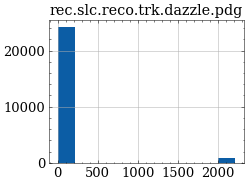

In [6]:
shw_pdgs[shw_pdgs.loc[:,'rec.slc.reco.trk.dazzle.pdg']!=-5].hist()

In [7]:
idx = CAFpic.get_df(tree,['rec.slc.truth.wgt..idx','rec.slc.truth.wgt.univ..idx'])
#idx.plot.hist()
idx[0].index

MultiIndex([(304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   4),
            (304, 76,   5),
            ...
            (342, 85, 484),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500),
            (342, 85, 500)],
           names=['rec.hdr.run', 'rec.hdr.subrun', 'rec.hdr.evt'], length=24536)

In [11]:

awk_wgt = tree.arrays(['rec.slc.truth.wgt.univ'])

In [25]:
ak_size = ak.size(awk_wgt,axis=0)
cnt = 0
arrs = []
labels =[]
for i in range(ak_size):
  cnt+=ak.to_numpy(awk_wgt[i]["0"]).shape[0]
  if cnt < 20*14228:
    print(cnt)
    arrs.append(ak.to_numpy(awk_wgt[i]["0"]))
    labels.append(f'{i:.0f} : {ak.to_numpy(awk_wgt[i]["0"]).shape[0]:.0f}')
print(cnt)

14228
28456
42684
56912
71140
85368
99596
113824
128052
142280
156508
156508
170736
184964
199192
213420
227648
241876
241876
241876
256104
35826104


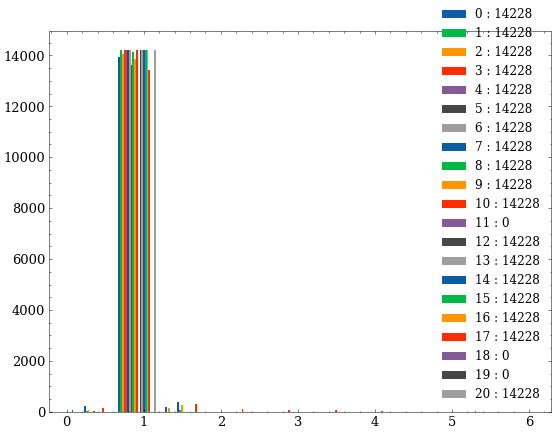

In [26]:
plt.figure(figsize=(9,7))
plt.hist(arrs,label=labels)
plt.legend()

In [18]:
wgt_arr = ak.to_numpy(awk_wgt[0]["0"])
wgt_arr.shape[0]

14228

In [57]:
14228/52

273.61538461538464

In [58]:
256984/4942
70314776/4942

14228.0

In [9]:
for batch in tree.iterate(step_size=50,library='pd'):
  #weight = batch.arrays(['rec.mc.nu.wgt.univ'].extend(CAFpic.hdrkeys))
  #weight = CAFpic.get_df(batch,['rec.mc.nu.wgt.univ'])
  #print(weight.head(10))
  print(batch)

In [13]:
weight_df = ak.to_pandas(weight)

: 

: 

In [16]:
weight.plot('rec.mc.nu.wgt.univ..idx')

TypeError: no numeric data to plot

In [2]:
#Write down CAF keys we want to use
# hdr_keys = CAFpic.hdrkeys
# nreco_keys = nuecc.nreco_keys
# shw_keys = nuecc.shw_keys
# mcnu_keys = nuecc.mcnu_keys
# mcslc_keys = nuecc.mcslc_keys
# mcprim_keys = nuecc.mcprim_keys
# shwslc_keys = nuecc.shwslc_keys

event = (87,11,402)

In [8]:
primdfs = []
mcdfs = []
slcdfs = []
shwslcdfs = []
weights = []
for i,file in enumerate(flat):
  start = time()
  tree = uproot.open(f'{DATA_DIR}{file}')
  keys = tree.keys()
  recTree_name = tree.keys()[0]
  #mc
  mc = CAFpic.get_df(tree[recTree_name],mcnu_keys)
  if not event in mc.index.drop_duplicates(): continue #Skip events without this index
  mcdfs.append(mc)
  #slc
  slc = CAFpic.get_df(tree[recTree_name],mcslc_keys)
  slcdfs.append(slc)
  #prim
  mc = CAFpic.get_df(tree[recTree_name],mcprim_keys)
  primdfs.append(mc)
  #shwslc
  shwslc = CAFpic.get_df(tree[recTree_name],shwslc_keys)
  shwslcdfs.append(shwslc)
  
  #wgts
  #weight_keys = [CAFpic.nuprefix+key for key in keys if 'wgt' in key]
  #weight = CAFpic.get_df(tree[recTree_name],weight_keys)
  #print(type(weight))
  #weights.append(weight)
  stop = time()
  print(f'{file} : {stop-start:.1f}(s)')
  break
nu = pd.concat(mcdfs)
slc = pd.concat(slcdfs)
prim = pd.concat(primdfs)
shwslc = pd.concat(shwslcdfs)
#weight = pd.concat(weights)

KeyboardInterrupt: 

In [12]:
mcslc_keys.extend(['rec.slc.truth.E','rec.slc.truth.Q2','rec.slc.truth.plane.0.0.visE'])

In [13]:
mcslc_keys

['rec.slc.truth.pdg',
 'rec.slc.truth.npizero',
 'rec.slc.truth.parent_pdg',
 'rec.slc.truth.position.x',
 'rec.slc.truth.position.y',
 'rec.slc.truth.position.z',
 'rec.slc.truth.E',
 'rec.slc.truth.E',
 'rec.slc.truth.E',
 'rec.slc.truth.E',
 'rec.slc.truth.Q2',
 'rec.slc.truth.E',
 'rec.slc.truth.Q2',
 'rec.slc.truth.plane.0.0.visE']

In [14]:
file = 'flat_caf_1010-9b4c8e4e-210c-4a40-ba84-da7febb5a493.root'
tree = uproot.open(f'{DATA_DIR}{file}')
keys = tree.keys()
recTree_name = tree.keys()[0]
nreco = CAFpic.get_df(tree[recTree_name],nreco_keys)
slc = CAFpic.get_df(tree[recTree_name],mcslc_keys)



In [18]:
slc.head()

rec.slc.truth.pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                      
206         7              1                           -1   
                           1                           -1   
                           1                           -1   
                           1                           -1   
                           1                           -1   

                                        rec.slc.truth.npizero  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                          
206         7              1                                0   
                           1                                0   
                           1                                0   
                           1                                0   
                           1                                0   

                                        rec.slc.truth.parent_pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              1                                  -1   
                           1                                  -1   
                           1                                  -1   
                           1                                  -1   
                           1                                  -1   

                                        rec.slc.truth.position.x  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   

                                        rec.slc.truth.position.y  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   

                                        rec.slc.truth.position.z  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   
                           1                                 NaN   

                                        rec.slc.truth.E  rec.slc.truth.E  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                     
206         7              1                        NaN              NaN   
                           1                        NaN              NaN   
                           1                        NaN              NaN   
                           1                        NaN              NaN   
                           1                        NaN              NaN   

                                        rec.slc.truth.E  rec.slc.truth.E  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                     
206         7              1                        NaN              NaN   
                           1                        NaN              NaN   
                           1                        NaN              NaN   
                           1                        NaN              NaN   
                           1                        NaN              NaN   

                                        rec.slc.truth.Q2  rec.slc.truth.E  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                      
206         7              1

In [20]:
slc[abs(slc.loc[:,'rec.slc.truth.pdg']==14)]

rec.slc.truth.pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                      
206         7              4                           14   
                           7                           14   
                           11                          14   
                           15                          14   
                           17                          14   
...                                                   ...   
295         96             532                         14   
                           536                         14   
                           536                         14   
                           556                         14   
                           578                         14   

                                        rec.slc.truth.npizero  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                          
206         7              4                                0   
                           7                                0   
                           11                               0   
                           15                               0   
                           17                               0   
...                                                       ...   
295         96             532                              0   
                           536                              0   
                           536                              0   
                           556                              0   
                           578                              0   

                                        rec.slc.truth.parent_pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              4                                 211   
                           7                                 211   
                           11                                211   
                           15                                211   
                           17                                211   
...                                                          ...   
295         96             532                               211   
                           536                               211   
                           536                               211   
                           556                               211   
                           578                               211   

                                        rec.slc.truth.position.x  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              4                          239.543167   
                           7                           -1.931548   
                           11                        -183.334549   
                           15                          63.537750   
                           17                         -67.913216   
...                                                          ...   
295         96             532                        -39.240810   
                           536                        106.466637   
                           536                       -120.510185   
                           556                       -228.560135   
                           578                        -65.874748   

                                        rec.slc.truth.position.y  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
206         7              4                         -181.125931   
                           7                          -67.902908   
                           11                         107.594818   
                           15                         144.130035   
                           17                         -75.116104   
...                                                          ...   
295         96             532                       -112.521080   
                  

In [12]:
prim.loc[(210,7,460)]
nu.loc[(210,7,460)]
nreco.loc[(210,7,460)]

rec.reco.nshw     39
rec.reco.ntrk     11
rec.reco.nstub     3
Name: (210, 7, 460), dtype: uint64

In [13]:
#nue_prim = CAFpic.true_nue(prim,drop=False)
#nuecc_mc,nuecc_inds = CAFpic.true_nuecc(nu,drop=False)
shwslc.head(20)
shwslc.loc[:,f'{CAFpic.recoslcprefix}shw.dir.x']**2+shwslc.loc[:,f'{CAFpic.recoslcprefix}shw.dir.y']**2+shwslc.loc[:,f'{CAFpic.recoslcprefix}shw.dir.z']**2
shwslc.loc[:,'theta1'] = np.arccos(shwslc.loc[:,f'{CAFpic.recoslcprefix}shw.dir.z'])
shwslc = CAFpic.calc_thetat(shwslc,return_key='theta2',px_key=f'{CAFpic.recoslcprefix}shw.dir.x',py_key=f'{CAFpic.recoslcprefix}shw.dir.y',
  pz_key=f'{CAFpic.recoslcprefix}shw.dir.z')
shwslc.head()

/sbnd/data/users/brindenc/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in arccos
  result = getattr(ufunc, method)(*inputs, **kwargs)
/sbnd/app/users/brindenc/mypython/bc_utils/CAFana/pic/helpers.py:94: RuntimeWarning: divide by zero encountered in true_divide
  thetat = np.arctan(np.sqrt(px**2+py**2)/pz)


rec.slc.reco.shw.razzle.electronScore  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                          
304         76             4                                         0.174426   
                           4                                        -5.000000   
                           4                                        -5.000000   
                           4                                        -5.000000   
                           4                                        -5.000000   

                                        rec.slc.reco.shw.bestplane_energy  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                      
304         76             4                                     0.097943   
                           4                                     0.027695   
                           4                                     0.014311   
                           4                                     0.006922   
                           4                                     0.005440   

                                        rec.slc.reco.shw.dir.x  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                           
304         76             4                          0.162357   
                           4                          0.896950   
                           4                          0.190144   
                           4                         -0.385237   
                           4                          0.256614   

                                        rec.slc.reco.shw.dir.y  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                           
304         76             4                          0.877813   
                           4                          0.173679   
                           4                          0.760086   
                           4                         -0.533644   
                           4                         -0.932503   

                                        rec.slc.reco.shw.dir.z  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                           
304         76             4                         -0.450650   
                           4                          0.406590   
                           4                          0.621381   
                           4                          0.752872   
                           4                         -0.254139   

                                        rec.slc.reco.shw.razzle.pdg    theta1  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                          
304         76             4                                     22  2.038289   
                           4                                     -5  1.152077   
                           4                                     -5  0.900292   
                           4                                     -5  0.718381   
                           4                                     -5  1.827754   

                                          theta2  
rec.hdr.run rec.hdr.subrun rec.hdr.evt            
304         76             4            1.103303  
                           4            1.152077  
                           4            0.900292  
                           4            0.718381  
                           4            1.313838

In [9]:
prim.head(20)

rec.mc.nu.prim.pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                       
304         76             4                            13   
                           4                            22   
                           4                          2112   
                           4                          2212   
                           4                            13   
                           4                          2112   
                           4                           111   
                           4                          2212   
                           4                           211   
                           5                            13   
                           5                          2212   
                           5                          2212   
                           5                          2212   
                           5                          2212   
                           5                          2112   
                           5                          2112   
                           5                          2112   
                           5                          2112   
                           5                          2112   
                           8                            13   

                                        rec.mc.nu.prim.gstatus  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                           
304         76             4                                -1   
                           4                                -1   
                           4                                -1   
                           4                                -1   
                           4                                -1   
                           4                                -1   
                           4                                -1   
                           4                                -1   
                           4                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           5                                -1   
                           8                                -1   

                                        rec.mc.nu.prim.genT  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                        
304         76             4                       0.589234   
                           4                       0.589234   
                           4                       0.589234   
                           4                       0.589234   
                           4                       0.646227   
                           4                       0.646227   
                           4                       0.646227   
                           4                       0.646227   
                           4                       0.646227   
                           5                       1.197279   
                           5                       1.197279   
                           5                       1.197279   
                           5                       1.197279   
                           5                       1.197279   
                           5                       1.197279   
                           5                       1.197279   
                           5                       1.197279   
                         

In [18]:
slc.head(20)

rec.slc.truth.pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                      
304         76             4                           14   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           4                           -1   
                           5                           14   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           5                           -1   
                           8                           -1   
                           8                           14   
                           8                           -1   
                           8                           -1   

                                        rec.slc.truth.npizero  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                          
304         76             4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           4                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           5                                0   
                           8                                0   
                           8                                0   
                           8                                0   
                           8                                0   

                                        rec.slc.truth.parent_pdg  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                             
304         76             4                                 211   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           4                                  -1   
                           5                                 211   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           5                                  -1   
                           8              

In [37]:
nuecc_mc.head()

rec.mc.nu.iscc  rec.mc.nu.position.x  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                         
304         90             247                       1            178.577591   
                           247                       0             56.214413   
305         64             68                        1            159.697449   
                           68                        0             96.781685   
                           68                        1           -358.653229   

                                        rec.mc.nu.position.y  \
rec.hdr.run rec.hdr.subrun rec.hdr.evt                         
304         90             247                     -8.991252   
                           247                    -77.626137   
305         64             68                     210.685974   
                           68                    -621.638489   
                           68                    -543.317688   

                                        rec.mc.nu.position.z  rec.mc.nu.pdg  
rec.hdr.run rec.hdr.subrun rec.hdr.evt                                       
304         90             247                   -289.580566             12  
                           247                     -2.921631             14  
305         64             68                      65.078125             14  
                           68                     384.905548             14  
                           68                     100.778061             12

In [46]:
nu.loc[:,'f'] = -1

/tmp/ipykernel_4177/2626099383.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  nu.loc[(304,76,4)].iloc[2]


IndexError: single positional indexer is out-of-bounds

In [22]:
nu.loc[(304,76,4),'rec.mc.nu.initpdg'].values[0]

14

In [23]:
nu.loc[(304,76,5),'rec.mc.nu.initpdg'].values[0]

14

In [4]:
uproot.open('root://fndca1.fnal.gov:1094/pnfs/fnal.gov/usr/sbnd/persistent/sbndpro/mcp/mc/official/MCP2022A/prodoverlay_corsika_cosmics_proton_genie_rockbox_sce/v09_37_02_04/reco2_caf/flat_caf_1088-bec17d4c-b9fd-4111-bfb0-2db0f1fe31c5.root')

ImportError: Install XRootD python bindings with:

    conda install -c conda-forge xrootd

(or download from http://xrootd.org/dload.html and manually compile with cmake; setting PYTHONPATH and LD_LIBRARY_PATH appropriately).